<a href="https://colab.research.google.com/github/jenishaprincess/DIA-RET/blob/main/RF_001_XNET_50_70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from keras.applications import Xception  # Import Xception model
from keras.applications.xception import preprocess_input  # Import Xception preprocessing function
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data directories
train_dir = '/content/drive/MyDrive/DR_50_70/Train_70'
test_dir = '/content/drive/MyDrive/DR_50_70/Test_70'


In [3]:
# Xception
model_xception = Xception(weights='imagenet', include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [4]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Adjusted target size for Xception
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input using Xception preprocessing
    features = model_xception.predict(img_data)
    return features

In [5]:
# Load images and extract features for VGG16
x_train_b7, y_train_b7 = [], []
x_test_b7, y_test_b7 = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train_b7.append(features)
        y_train_b7.append(i)

1/1 [==============================] - 0s 358ms/step


In [6]:
# Load images and extract features
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test_b7.append(features)
        y_test_b7.append(i)

1/1 [==============================] - 0s 372ms/step


In [7]:
# Flatten the features
x_train_flat_b7 = np.array([feature.flatten() for feature in x_train_b7])
x_test_flat_b7 = np.array([feature.flatten() for feature in x_test_b7])

In [8]:
# Scale the input features to the range [0, 1]
scaler_b7 = MinMaxScaler()
x_train_scaled_b7 = scaler_b7.fit_transform(x_train_flat_b7)
x_test_scaled_b7 = scaler_b7.transform(x_test_flat_b7)

# Ensure non-negative values
min_value_b7 = np.min(np.concatenate([x_train_scaled_b7, x_test_scaled_b7]))
x_train_scaled_non_negative_b7 = x_train_scaled_b7 - min_value_b7
x_test_scaled_non_negative_b7 = x_test_scaled_b7 - min_value_b7

Training Random Forest (max_features='sqrt') for XNET...
Performance metrics for Random Forest (max_features='sqrt') with XNET:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       135
           1       0.97      0.87      0.92       135
           2       0.88      0.77      0.82       135
           3       0.76      0.87      0.81       135
           4       0.89      0.87      0.88       135

    accuracy                           0.85       675
   macro avg       0.86      0.85      0.85       675
weighted avg       0.86      0.85      0.85       675

True Positives: 573
True Negatives: 2598
False Positives: 102
False Negatives: 102
Accuracy: 0.9395555555555556
Precision: 0.8569837964113525
Specificity: 0.9622222222222222
Sensitivity: 0.8488888888888889
F1 Score: 0.8503009536858048
Recall: 0.8488888888888889



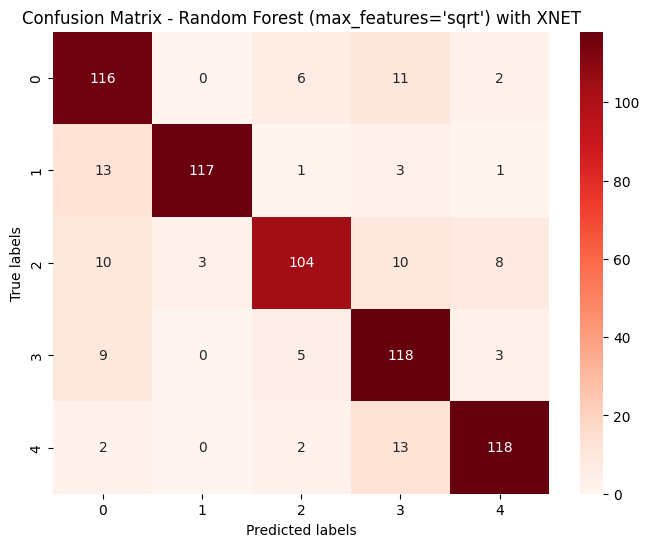

Training Random Forest (max_features='auto') for XNET...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Performance metrics for Random Forest (max_features='auto') with XNET:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       135
           1       0.97      0.87      0.92       135
           2       0.88      0.77      0.82       135
           3       0.76      0.87      0.81       135
           4       0.89      0.87      0.88       135

    accuracy                           0.85       675
   macro avg       0.86      0.85      0.85       675
weighted avg       0.86      0.85      0.85       675

True Positives: 573
True Negatives: 2598
False Positives: 102
False Negatives: 102
Accuracy: 0.9395555555555556
Precision: 0.8569837964113525
Specificity: 0.9622222222222222
Sensitivity: 0.8488888888888889
F1 Score: 0.8503009536858048
Recall: 0.8488888888888889



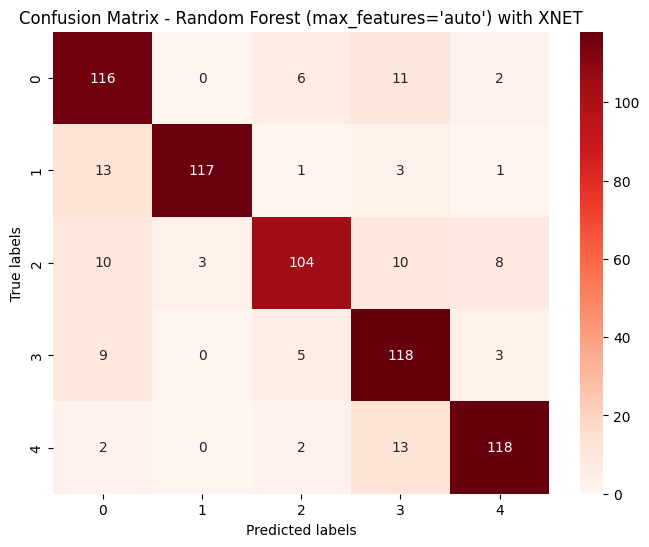

Training Random Forest (max_features='log2') for XNET...
Performance metrics for Random Forest (max_features='log2') with XNET:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       135
           1       0.97      0.84      0.90       135
           2       0.84      0.73      0.78       135
           3       0.74      0.81      0.78       135
           4       0.85      0.89      0.87       135

    accuracy                           0.82       675
   macro avg       0.83      0.82      0.82       675
weighted avg       0.83      0.82      0.82       675

True Positives: 552
True Negatives: 2577
False Positives: 123
False Negatives: 123
Accuracy: 0.9271111111111111
Precision: 0.825991419104521
Specificity: 0.9544444444444444
Sensitivity: 0.8177777777777777
F1 Score: 0.8192081163179343
Recall: 0.8177777777777777



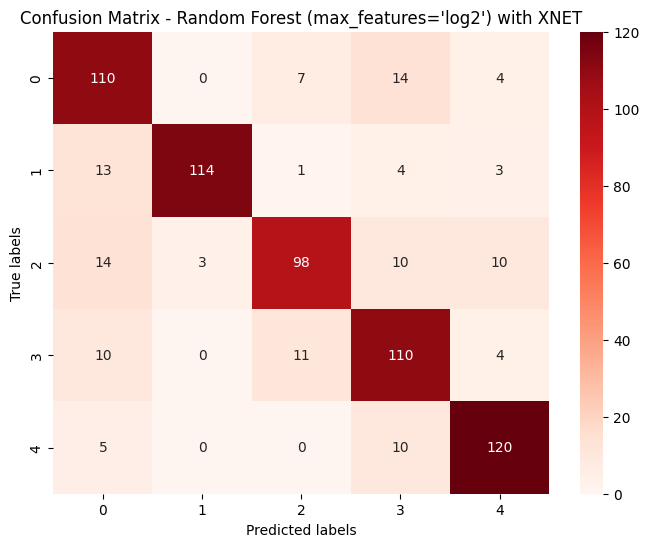

In [9]:
# Define Random Forest classifiers
classifiers_rf = {
    "Random Forest (max_features='sqrt')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42),
    "Random Forest (max_features='auto')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42),
    "Random Forest (max_features='log2')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42),
}
# Train Random Forest classifiers
for clf_name, clf_rf in classifiers_rf.items():
    print(f"Training {clf_name} for XNET...")
    # Train classifier
    clf_rf.fit(x_train_scaled_non_negative_b7, y_train_b7)
    # Predict on test set
    y_pred_rf = clf_rf.predict(x_test_scaled_non_negative_b7)
    # Print performance metrics for Random Forest
    print(f'Performance metrics for {clf_name} with XNET:')
    print('Classification Report:')
    print(classification_report(y_test_b7, y_pred_rf))
    # Compute confusion matrix
    cm_rf = confusion_matrix(y_test_b7, y_pred_rf)
    # Compute TP, TN, FP, FN for each class
    TP_rf = np.diag(cm_rf)
    FP_rf = np.sum(cm_rf, axis=0) - TP_rf
    FN_rf = np.sum(cm_rf, axis=1) - TP_rf
    num_classes_rf = cm_rf.shape[0]
    TN_rf = []
    for i in range(num_classes_rf):
        temp_rf = np.delete(cm_rf, i, 0)   # delete ith row
        temp_rf = np.delete(temp_rf, i, 1)  # delete ith column
        TN_rf.append(sum(sum(temp_rf)))
    # Compute overall TP, TN, FP, FN
    overall_TP_rf = np.sum(TP_rf)
    overall_TN_rf = np.sum(TN_rf)
    overall_FP_rf = np.sum(FP_rf)
    overall_FN_rf = np.sum(FN_rf)
    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy_rf = (overall_TP_rf + overall_TN_rf) / (overall_TP_rf + overall_TN_rf + overall_FP_rf + overall_FN_rf)
    precision_rf = metrics.precision_score(y_test_b7, y_pred_rf, average='macro')
    recall_rf = metrics.recall_score(y_test_b7, y_pred_rf, average='macro')
    f1_rf = metrics.f1_score(y_test_b7, y_pred_rf, average='macro')
    specificity_rf = overall_TN_rf / (overall_TN_rf + overall_FP_rf)
    # Print performance metrics
    print(f'True Positives: {overall_TP_rf}')
    print(f'True Negatives: {overall_TN_rf}')
    print(f'False Positives: {overall_FP_rf}')
    print(f'False Negatives: {overall_FN_rf}')
    print(f'Accuracy: {accuracy_rf}')
    print(f'Precision: {precision_rf}')
    print(f'Specificity: {specificity_rf}')
    print(f'Sensitivity: {recall_rf}')
    print(f'F1 Score: {f1_rf}')
    print(f'Recall: {recall_rf}\n')
    # Plot confusion matrix
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with XNET')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()



Training Random Forest (max_features='sqrt') for XNET...
Training Random Forest (max_features='auto') for XNET...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Random Forest (max_features='log2') for XNET...


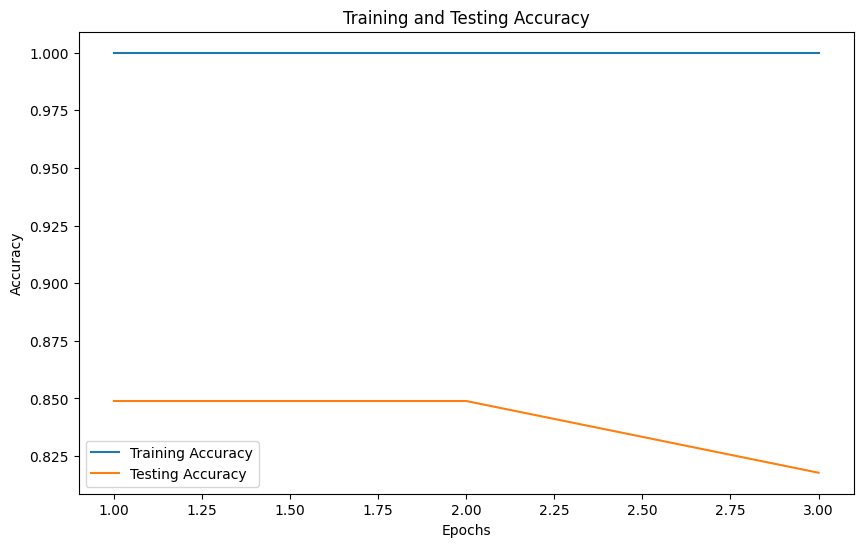

In [10]:
# Train and evaluate Random Forest classifiers
history_accuracy_train = []
history_accuracy_test = []
for clf_name, clf_rf in classifiers_rf.items():
    print(f"Training {clf_name} for XNET...")
    # Train classifier
    clf_rf.fit(x_train_scaled_non_negative_b7, y_train_b7)
    # Predict on train set
    y_pred_train_rf = clf_rf.predict(x_train_scaled_non_negative_b7)
    # Calculate train accuracy
    accuracy_train = metrics.accuracy_score(y_train_b7, y_pred_train_rf)
    # Predict on test set
    y_pred_test_rf = clf_rf.predict(x_test_scaled_non_negative_b7)
    # Calculate test accuracy
    accuracy_test = metrics.accuracy_score(y_test_b7, y_pred_test_rf)
    # Append to history
    history_accuracy_train.append(accuracy_train)
    history_accuracy_test.append(accuracy_test)

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), history_accuracy_train, label='Training Accuracy')
plt.plot(range(1, 4), history_accuracy_test, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()